## INFS 770 - Assignment 1

**Note**: Created using Anaconda Python 3.7.1 (64-bit)

---

### Pre-task setup

In [1]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-Learn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Load data
data_file = "magic04.data"
var_names = [
    "fLength",   # continuous # major axis of ellipse [mm]
    "fWidth",    # continuous # minor axis of ellipse [mm]
    "fSize",     # continuous # 10-log of sum of content of all pixels [in #phot]
    "fConc",     # continuous # ratio of sum of two highest pixels over fSize [ratio]
    "fConc1",    # continuous # ratio of highest pixel over fSize [ratio]
    "fAsym",     # continuous # distance from highest pixel to center, projected onto major axis [mm]
    "fM3Long",   # continuous # 3rd root of third moment along major axis [mm]
    "fM3Trans",  # continuous # 3rd root of third moment along minor axis [mm]
    "fAlpha",    # continuous # angle of major axis with vector to origin [deg]
    "fDist",     # continuous # distance from origin to center of ellipse [mm]
    "class"      # g,h        # gamma (signal), hadron (background) 
]

df_data = pd.read_csv(data_file, sep=",", names=var_names)

### Data exploration & visualization

In [3]:
# Examine data types from the data frame
df_data.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [4]:
# Show first few values of the data frame
df_data.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


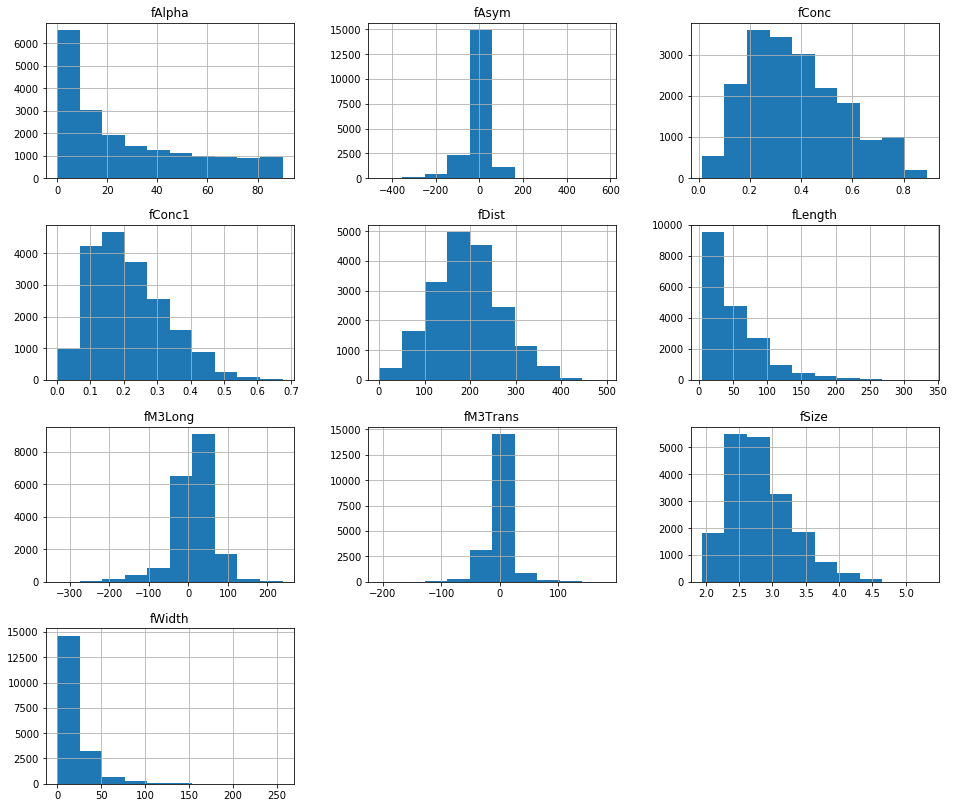

In [5]:
# produce some histograms
df_data.hist(figsize=(16, 14));

In [6]:
# produce summary statistics for numerical attributes
# produce value counts for categorical attributes

for var_name in var_names:
    print("-"*50)
    print(var_name)
    if df_data[var_name].dtype == object:
        print(df_data[var_name].value_counts())
    else:
        print(df_data[var_name].describe())

--------------------------------------------------
fLength
count    19020.000000
mean        53.250154
std         42.364855
min          4.283500
25%         24.336000
50%         37.147700
75%         70.122175
max        334.177000
Name: fLength, dtype: float64
--------------------------------------------------
fWidth
count    19020.000000
mean        22.180966
std         18.346056
min          0.000000
25%         11.863800
50%         17.139900
75%         24.739475
max        256.382000
Name: fWidth, dtype: float64
--------------------------------------------------
fSize
count    19020.000000
mean         2.825017
std          0.472599
min          1.941300
25%          2.477100
50%          2.739600
75%          3.101600
max          5.323300
Name: fSize, dtype: float64
--------------------------------------------------
fConc
count    19020.000000
mean         0.380327
std          0.182813
min          0.013100
25%          0.235800
50%          0.354150
75%          0.503700


### Dummy coding

In [7]:
# Do dummy coding for categorical variables
for var in var_names:
    if df_data[var].dtype == object:
        df_data = pd.get_dummies(df_data, prefix=var, columns=[var], drop_first=True)
print(df_data.dtypes)

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class_h       uint8
dtype: object


In [8]:
# Examine dummy-coded data frame
print(df_data.head(5))

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class_h  
0  40.0920   81.8828        0  
1   6.3609  205.2610        0  
2  76.9600  256.7880        0  
3  10.4490  116.7370        0  
4   4.6480  356.4620        0  


## Task 2: Classification using scikit-learn & pandas

#### Task 2.1

In [9]:
# Task 2.1: Load & divide the data up into training & test sets, 65% / 35% splits
attributes = [col for col in var_names if col != "class"]
X_train, X_test, y_train, y_test = train_test_split(df_data[attributes], df_data["class_h"], test_size=0.35, random_state=0)

#### Task 2.2

In [10]:
# Task 2.2: Fit a model using scikit-learn's logistic Regression Classifier

# Create our Logistic Regression object
lr_clf = LogisticRegression(random_state=50, 
                         solver='newton-cg', 
                         multi_class='multinomial')

# Fit our Logistic Regression model
lr_model = lr_clf.fit(X_train, y_train)

# Predict values for our classification report
lr_pred = lr_model.predict(X_test)

In [11]:
# Print evaluation measures
print("Classification Report (Logistic Regression): \n")
for line in classification_report(y_test, lr_pred).split("\n"):
    print(line)

Classification Report (Logistic Regression): 

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4295
           1       0.77      0.59      0.67      2362

   micro avg       0.79      0.79      0.79      6657
   macro avg       0.79      0.75      0.76      6657
weighted avg       0.79      0.79      0.78      6657



In [12]:
# Print Logistic Regression Accuracy
lr_accuracy = lr_clf.score(X_test, y_test)
print("Logistic Regression accuracy on test set: {:.3f}".format(lr_accuracy))

Logistic Regression accuracy on test set: 0.792


#### Task 2.3

In [13]:
# Task 2.3: Fit a model using scikit-learn's SVM classifier

# Create our SVM object
svm_clf = SVC()
print(svm_clf)

# Fit our SVM model
svm_model = svm_clf.fit(X_train, y_train)

# Predict values for our classification report
svm_pred = svm_model.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [14]:
# Print evaluation measures
print("Classification Report (SVM): \n")
for line in classification_report(y_test, svm_pred).split("\n"):
    print(line)

Classification Report (SVM): 

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      4295
           1       0.97      0.02      0.05      2362

   micro avg       0.65      0.65      0.65      6657
   macro avg       0.81      0.51      0.42      6657
weighted avg       0.76      0.65      0.53      6657



In [15]:
# Print SVM Accuracy
svm_accuracy = svm_clf.score(X_test, y_test)
print("SVM accuracy on test set: {:.3f}".format(svm_accuracy))

SVM accuracy on test set: 0.654


#### Task 2.4:  Answer follow-up questions

1) Please use your own language to describe the SVM algorithm (5-10 sentences)

Support Vector Machine is a machine learning algorithm used to classify data into two or more classes.  It does this through finding the best hyperplane to separate the data linearly.  That last piece is important -- your data needs to be able to be separated by a line.  When you can't separate your data nicely with a line, then you need to use the kernel trick, which maps your data to a higher-level dimension to be able to better find a line and hyperplane to separate your data.  You can also use soft margins to allow for some errors when fitting your model, and to help avoid overfitting.  Once you've found your optimal hyperplane to separate your data, you can then use it to make predictions on new data and predict which class the new data would best fall into.

2) Please use your own language to describe how soft margin svm is different from hard-margin SVM.(<=3 sentences)

A hard-margin in SVM works well when your data is perfectly linearly separable, and when you don't have any outliers in your data.  Soft margins allow for some slack when fitting your model, basically changing the weight of incorrect predictions in your model fitting.  Using soft margins in some cases can help you find a model that will generalize better for your data and avoid overfitting.

3) Why do you often need to use kernels in SVM? (<3 sentences)

As I mentioned in question 1, often times your data isn't nicely separable by a line, and so you can use the kernel trick to translate or map your data into a higher dimension.  In many cases, this translation can make it such that you can actually find an optimal hyperplane that will separate your data nicely.